In [5]:
from collections import deque
from clustering_driver import *

n, d, p = tree_loader("wai_tree_hierarchy.json")
q = deque()

q.append(0)
q.append(None)
level = 0
lr = [f"level,width"]
labels = [f'"0"']
parents = [f'""']
node_count = 0
while len(q) and q[0] != None:
    # q.append(None)
    while q[0] != None:
        node_count += 1
        # lr.append(f"{level},{len(q)}")
        nid = q.popleft()
        node = n[nid]
        lr.append(f"{level},{node.cluster_radius}")
        # print(lr[-1])
        if node.children != None and len(node.children):
            # print(node.children)
            for c in node.children:
                # labels.append(f"\"{str(c)}\"")
                # parents.append(f"\"{str(nid)}\"")
                # lr.append(f"{nid},{c}")
                q.append(c)
        # elif node.children == None:
        #     for d in node.data_refs:
        #         lr.append(f"{nid},{d}")
    q.popleft()
    if len(q):
        q.append(None)
    print(node_count)
    level += 1

f = open("stats.csv", "w")
f.write(",\n".join(lr))
f.close()

1
3
7
13
23
41
63
97
127
149
177
199
213
227
241
251
255


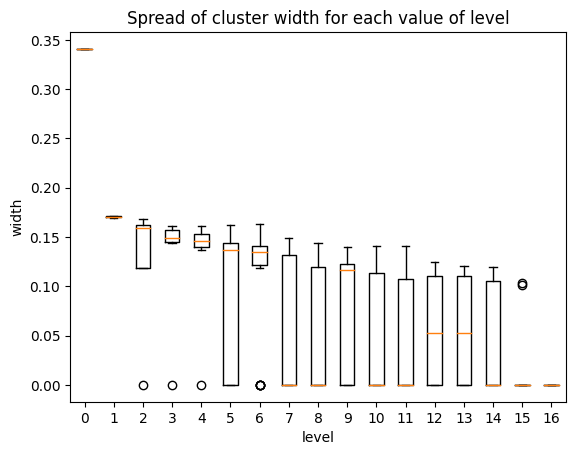

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("stats.csv")

# Group the data by unique values in col1 and collect the corresponding values in col2
grouped_data = [
    df.loc[df["level"] == value, "width"].values for value in df["level"].unique()
]

# Plotting a box plot
plt.boxplot(grouped_data, labels=df["level"].unique())
plt.title("Spread of cluster width for each value of level")
plt.xlabel("level")
plt.ylabel("width")
plt.show()

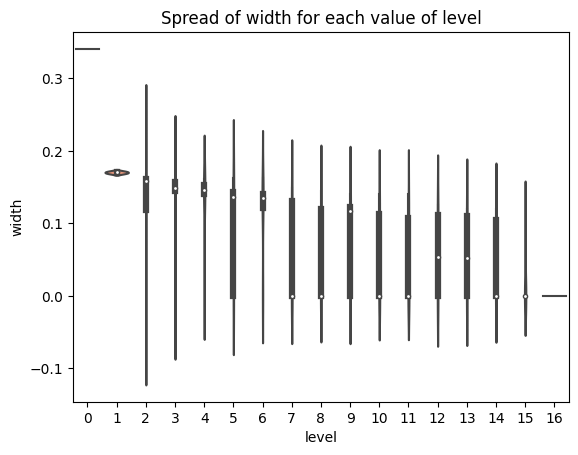

In [7]:
import seaborn as sns

# Use seaborn for a violin plot
# f = open("w")
sns.violinplot(x="level", y="width", data=df)
plt.title("Spread of width for each value of level")
plt.xlabel("level")
plt.ylabel("width")
plt.show()

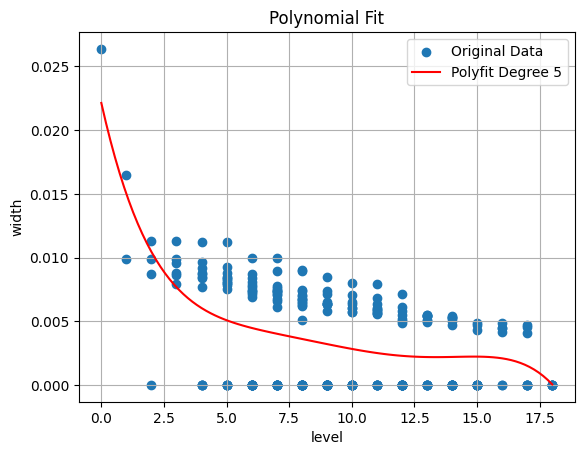

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Read the CSV file into a DataFrame
# df = pd.read_csv('data.csv')

# Extract the values from the two columns
col1 = df["level"]
col2 = df["width"]

# Fit a polynomial of degree N to the data
degree = 5  # Adjust the degree as needed
coefficients = np.polyfit(col1, col2, degree)

# Create a polynomial function using the coefficients
poly_function = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(min(col1), max(col1), 100)

# Compute the corresponding y values using the polynomial function
y_fit = poly_function(x_fit)

# Plotting the original data
plt.scatter(col1, col2, label="Original Data")

# Plotting the fitted polynomial
plt.plot(x_fit, y_fit, label=f"Polyfit Degree {degree}", color="red")

plt.title("Polynomial Fit")
plt.xlabel("level")
plt.ylabel("width")
plt.legend()
plt.grid(True)
plt.show()